# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [4]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target,columns=['target'])

## Perform a train-test-split

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

## Apply your model to the train set

#### Importing and initializing the model class

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#### Fitting the model to the train data

In [7]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Calculating predictions on the train set, and on the test set

In [8]:
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

#### Calculating your residuals

In [9]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
print(train_residuals)
print(test_residuals)

        target
376   4.456963
258  -4.675011
240   0.079744
400   8.906254
279  -2.851099
471   1.277661
457  -0.836304
200  -0.809947
204  -8.928572
297  -5.358924
175   1.752191
492   0.816584
222   1.410653
24    0.622916
397   8.179358
144  -1.360287
168  -0.983219
493  -1.086982
25   -0.032463
97   -0.212713
446   3.311403
327  -3.521783
335   2.035573
226   4.068408
73    1.236028
61    0.040757
460   2.392958
176  -0.947198
485   1.130052
295  -0.710327
..         ...
483  -1.194959
30   -0.916725
427   5.752057
169   0.743710
230  -3.954548
361   0.452752
318   0.158455
454  -0.233562
451   4.138532
488   1.200745
285   1.584192
63   -2.160763
417  -1.478984
87    2.149647
9    -4.302114
51    0.726105
479   0.625210
452   2.648202
394   6.298470
405  10.297631
280  -7.621570
16    2.561935
28    2.177902
403   7.030366
406  -1.534131
468  -2.968679
180  -7.743372
310   0.866618
336   1.376022
90    2.875933

[404 rows x 1 columns]
        target
401  11.441223
444   2.067510
6

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
train_mse = mean_squared_error(y_train,y_hat_train)
test_mse = mean_squared_error(y_test,y_hat_test)
print(train_mse)
print(test_mse)

21.23089935237338
23.858519448446664


If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

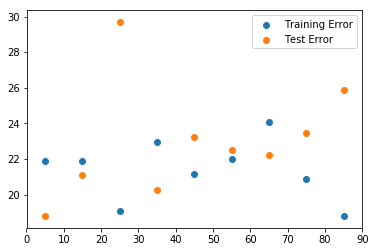

In [15]:
train_err = []
test_err = []
test_sizes = list(range(5,95,10))
for x in range(5,95,10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=x/100)
    lr.fit(X_train, y_train)
    y_hat_train = lr.predict(X_train)
    y_hat_test = lr.predict(X_test)
    train_err.append(mean_squared_error(y_train,y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))

plt.scatter(test_sizes,train_err, label='Training Error')
plt.scatter(test_sizes,test_err, label='Test Error')
plt.legend()

# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

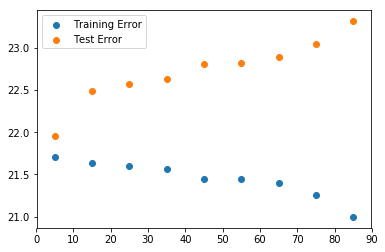

In [16]:
train_err = []
test_err = []
mean_error_train = []
mean_error_test = []
test_sizes = list(range(5,95,10))
for x in test_sizes:
    for n in range(0,100):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=x/100)
        lr.fit(X_train,y_train)
        y_hat_train = lr.predict(X_train)
        y_hat_test = lr.predict(X_test)
        train_err.append(mean_squared_error(y_train,y_hat_train))
        test_err.append(mean_squared_error(y_test,y_hat_test))
    mean_error_train.append(np.mean(train_err))
    mean_error_test.append(np.mean(test_err))
plt.scatter(test_sizes,mean_error_train, label='Training Error')
plt.scatter(test_sizes,mean_error_test,label='Test Error')
plt.legend()
    

What's happening here? evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.